In [1]:
import pandas as pd
import numpy as np
import datetime
from time import strftime 
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

In [2]:
base_data = pd.read_csv('Data.csv')

In [3]:
print(base_data.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [4]:
base_data.shape

(110527, 14)

In [5]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#change the date and time into standard form
# แปลงเป็น datetime64[ns]
base_data['ScheduledDay']=pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay']=pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
#pd.to_datetime(base_data['AppointmentDay']) = แปลงค่าภายในคอลัมน์ AppointmentDay ให้เป็นประเภท datetime64[ns] (รูปแบบวันที่-เวลา)
#.dt.date = ดึงเฉพาะส่วนของ "วันที่" ออกจากค่าของ datetime โดยลบส่วนของเวลาออกไป
#ผลลัพธ์ที่ได้จะเป็นประเภท object (Python date object)

#.astype('datetime64[ns]') = แปลงค่าที่ได้ให้กลับมาเป็นประเภท datetime64[ns] ของ Pandas เพื่อให้ DataFrame สามารถใช้งานการคำนวณและฟังก์ชันที่เกี่ยวข้องกับเวลาได้สะดวกขึ้น

In [8]:
base_data.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


# For the ScheduledDay/AppointmentDay storing the weekdays only into a variable

In [10]:
# Monday = 0
# Tuesday = 1
# Wednesday = 2
# Thursday = 3
# Friday = 4
# Saturday = 5 
# Sunday = 6

base_data['sch_weekday']=base_data['ScheduledDay'].dt.dayofweek

In [11]:
base_data['app_weekday']=base_data['AppointmentDay'].dt.dayofweek

In [12]:
base_data['sch_weekday'].value_counts()

sch_weekday
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [13]:
base_data['app_weekday'].value_counts()

app_weekday
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: count, dtype: int64

In [14]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [15]:
# changing the name of some columns
base_data=base_data.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','SMS_received':'SMSReceived','No-show':'NoShow'})

In [16]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [17]:
# dropping some columns which have no significance
base_data.drop(['PatientId','AppointmentID','Neighbourhood'], axis=1, inplace=True)

In [18]:
base_data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'NoShow', 'sch_weekday', 'app_weekday'],
      dtype='object')

In [19]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [20]:
base_data.describe()

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
min,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000
std,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672


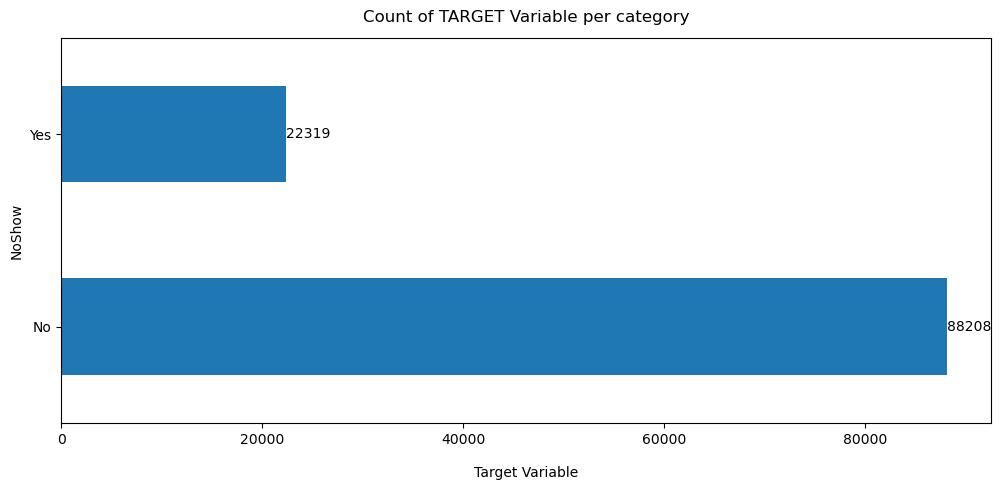

In [21]:
label=base_data['NoShow'].value_counts().plot(kind='barh', figsize=(12,5))
label.bar_label(label.containers[0])
# plt.xlabel("Count", labelpad=14)
plt.xlabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);
plt.show()

In [22]:
# calculating the % of appoinments or not 
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

NoShow
No     79.806744
Yes    20.193256
Name: count, dtype: float64

In [23]:
base_data['NoShow'].value_counts()

NoShow
No     88208
Yes    22319
Name: count, dtype: int64

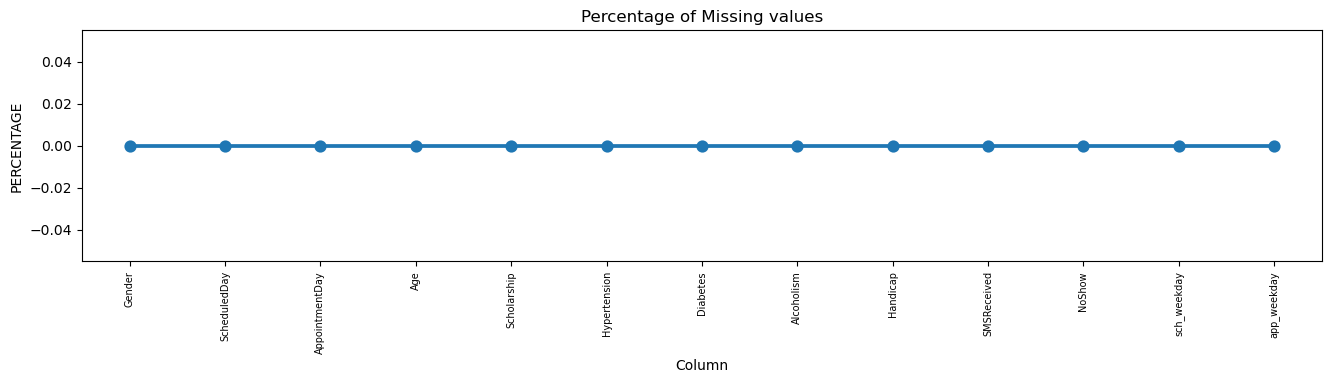

In [24]:
# Having a look that data contains missing values or not
missing = pd.DataFrame((base_data.isnull().sum())*100/base_data.shape[0]).reset_index()
missing.columns = ['Column', 'MissingPercentage']

# สร้างกราฟ
plt.figure(figsize=(16,3))
ax = sns.pointplot(x='Column', y='MissingPercentage', data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - Initial Intuition
Here, we don't have any missing data.

General Thumb Rules:

-For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.

-For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.

-As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

In [26]:
backup_data = base_data.copy()

In [27]:
base_data = backup_data.copy()

In [28]:
print(base_data.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'NoShow', 'sch_weekday', 'app_weekday'],
      dtype='object')


# Data Cleaning

In [57]:
# Create a copy of base data for manupulation & processing
new_data = base_data.copy()

In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Scholarship     110527 non-null  int64         
 5   Hypertension    110527 non-null  int64         
 6   Diabetes        110527 non-null  int64         
 7   Alcoholism      110527 non-null  int64         
 8   Handicap        110527 non-null  int64         
 9   SMSReceived     110527 non-null  int64         
 10  NoShow          110527 non-null  object        
 11  sch_weekday     110527 non-null  int32         
 12  app_weekday     110527 non-null  int32         
dtypes: datetime64[ns](2), int32(2), int64(7), object(2)
memory usage: 10.1+ MB


In [61]:
#As we don't have any null records, there's no data cleaning required
# Get the max tenure
# base_data['Age'].max() → หาอายุสูงสุดในคอลัมน์ Age ของ base_data

print(base_data['Age'].max())

115


In [63]:
# Group the tenure in bins of 12 months
# สร้าง Labels สำหรับแต่ละช่วงอายุ

# สร้าง label สำหรับกลุ่มอายุ โดยใช้ range(1, 118, 20) ซึ่งเริ่มต้นที่ 1 และเพิ่มทีละ 20 จนถึง 117
# ใช้ "{0} - {1}".format(i, i + 20) เพื่อสร้างชื่อของแต่ละช่วง เช่น:
# ['1 - 21', '21 - 41', '41 - 61', '61 - 81', '81 - 101', '101 - 121']

labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]

base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [ ]:
# จัดกลุ่มช่วงอายุด้วย pd.cut()

# pd.cut() ใช้แบ่งข้อมูล Age เป็นกลุ่ม ๆ ตามช่วงที่กำหนด
# range(1, 130, 20) → กำหนดช่วงของกลุ่มอายุ (จาก 1 ถึง 129 ทีละ 20)
# right=False → กำหนดให้ขอบขวาของช่วงไม่รวมอยู่ในช่วงนั้น
# labels=labels → กำหนดชื่อให้กับแต่ละช่วง (ที่สร้างไว้ก่อนหน้า)

In [65]:
# ลบคอลัมน์ Age ออกจาก base_data เพื่อให้เหลือแค่ Age_group

base_data.drop(['Age'], axis=1, inplace=True)

# Data Exploration

In [70]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'sch_weekday',
 'app_weekday',
 'Age_group']

In [72]:
#having a loook into the values of count of each columns and there count in respect to NoShow column
for i, predictor in enumerate(base_data.drop(columns=['NoShow'])):
    print('-'*10,predictor,'-'*10)
    print(base_data[predictor].value_counts())    
    plt.figure(i)
    sns.countplot(data=base_data, x=predictor, hue='NoShow')

---------- Gender ----------
Gender
F    71840
M    38687
Name: count, dtype: int64
---------- ScheduledDay ----------
ScheduledDay
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: count, Length: 111, dtype: int64
---------- AppointmentDay ----------
AppointmentDay
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: count, dtype: int64
---------- Scholarship ------

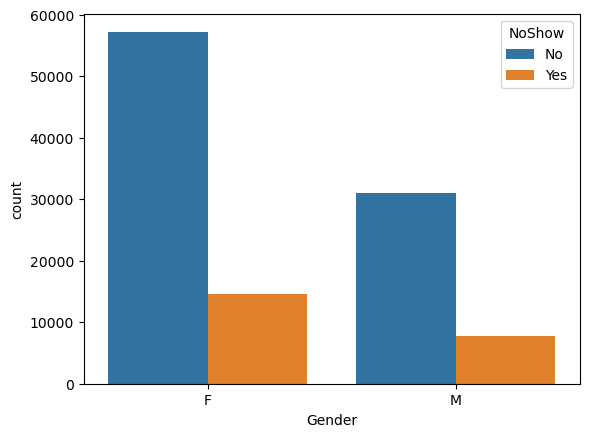

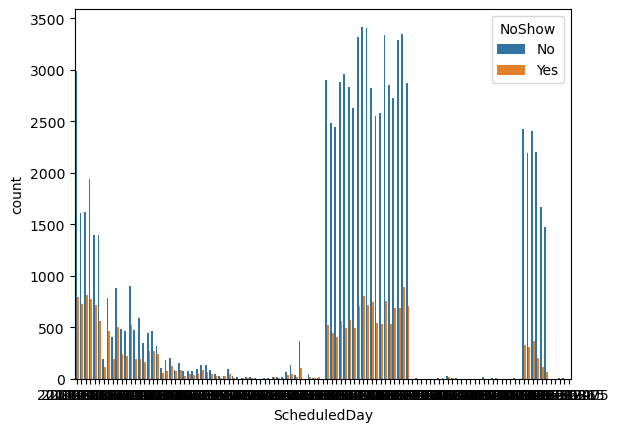

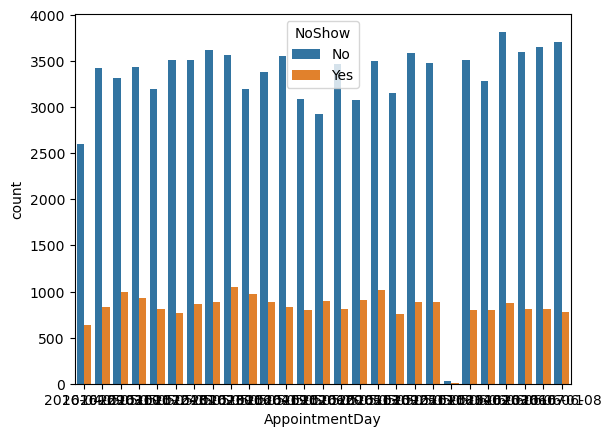

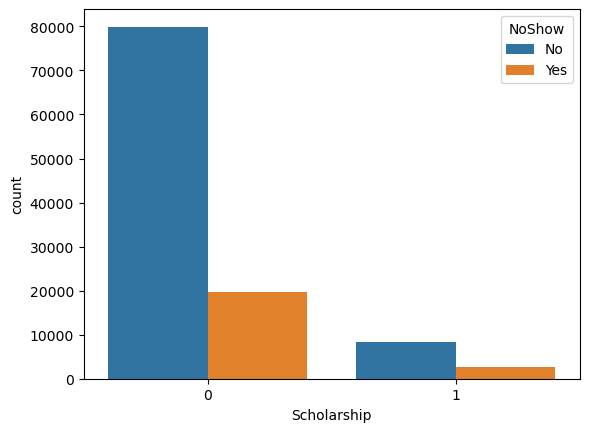

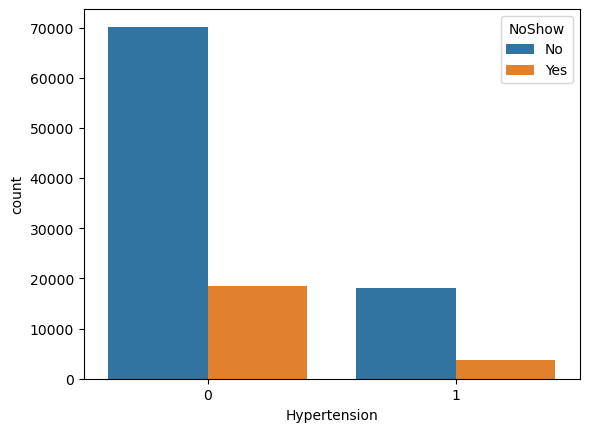

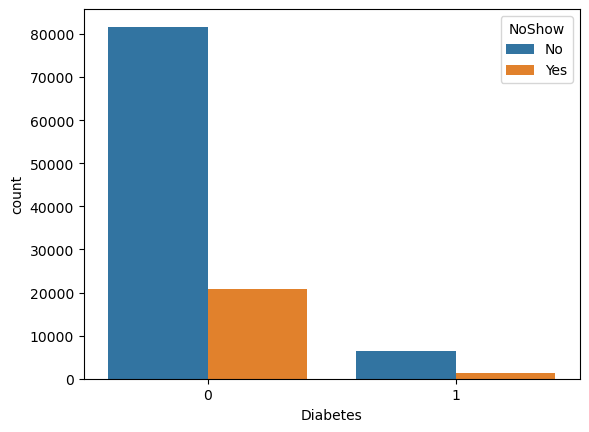

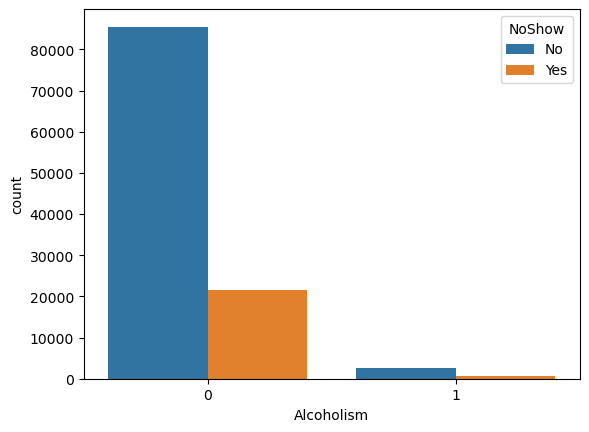

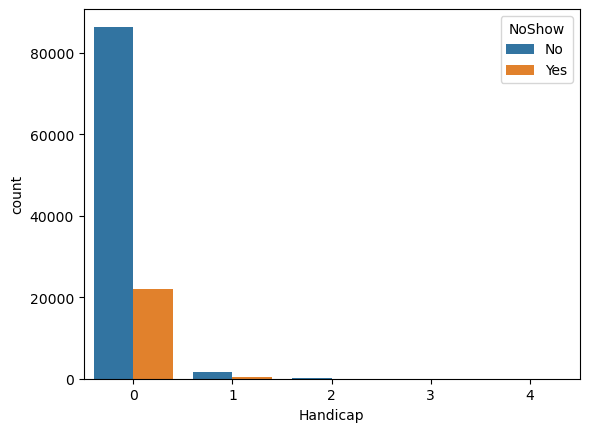

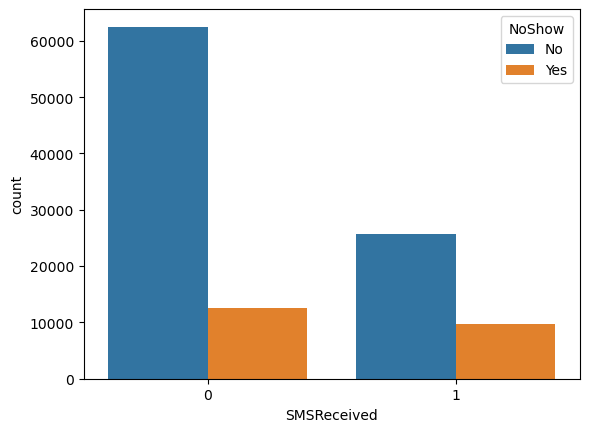

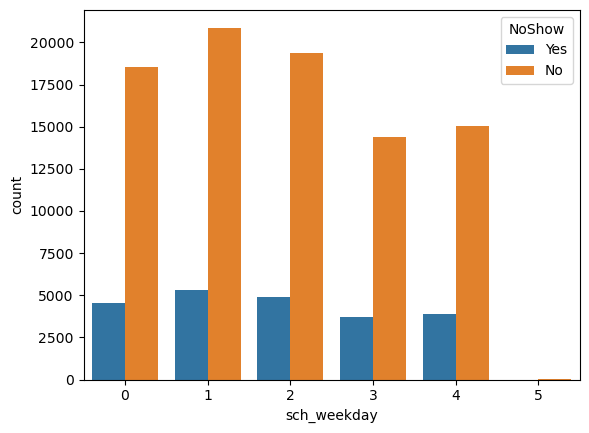

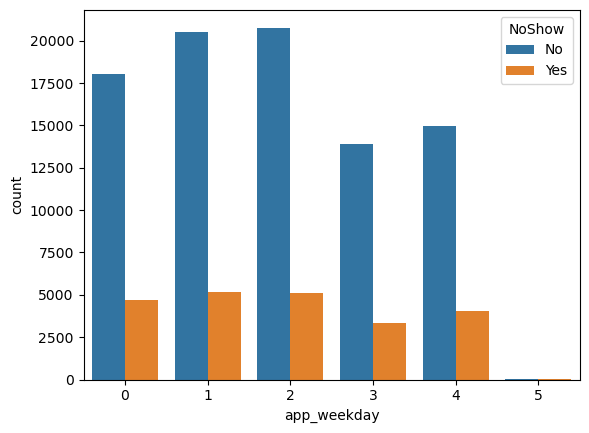

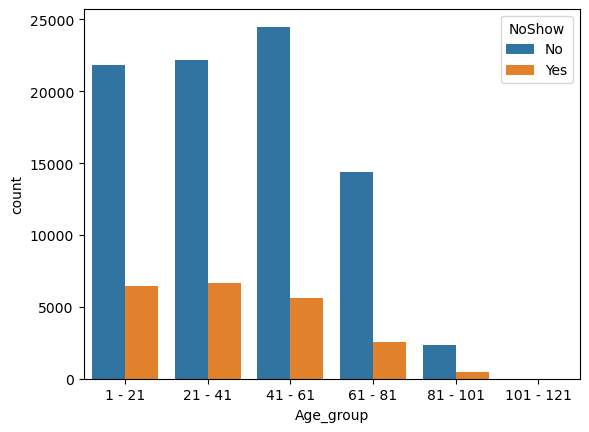

In [74]:
plt.show()

In [86]:
# np.where(condition, value_if_true, value_if_false)
# condition: base_data.NoShow == 'Yes' → ตรวจสอบว่าค่าในคอลัมน์ NoShow เป็น 'Yes' หรือไม่
# value_if_true: 1 → ถ้าเงื่อนไขเป็นจริง ('Yes') ให้แทนค่าด้วย 1
# value_if_false: 0 → ถ้าเงื่อนไขเป็นเท็จ ('No') ให้แทนค่าด้วย 0

base_data['NoShow'] = np.where(base_data.NoShow == 'Yes',1,0)

In [88]:
base_data.NoShow.value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

In [90]:
#แนะนำให้ใช้ base_data['NoShow'] เพื่อป้องกันปัญหาจากชื่อคอลัมน์ที่อาจมีช่องว่างหรือชนกับ attribute อื่นของ DataFrame
base_data['NoShow'].value_counts()

NoShow
0    88208
1    22319
Name: count, dtype: int64

In [92]:
# Convert all the categorical variables into dummy variables
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,ScheduledDay,AppointmentDay,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,0,1,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
1,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,False,True,False,False,True,False,False,False
2,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,False,False,False,True,False,False
3,2016-04-29,2016-04-29,0,0,0,0,0,0,0,4,4,True,False,True,False,False,False,False,False
4,2016-04-29,2016-04-29,0,1,1,0,0,0,0,4,4,True,False,False,False,True,False,False,False


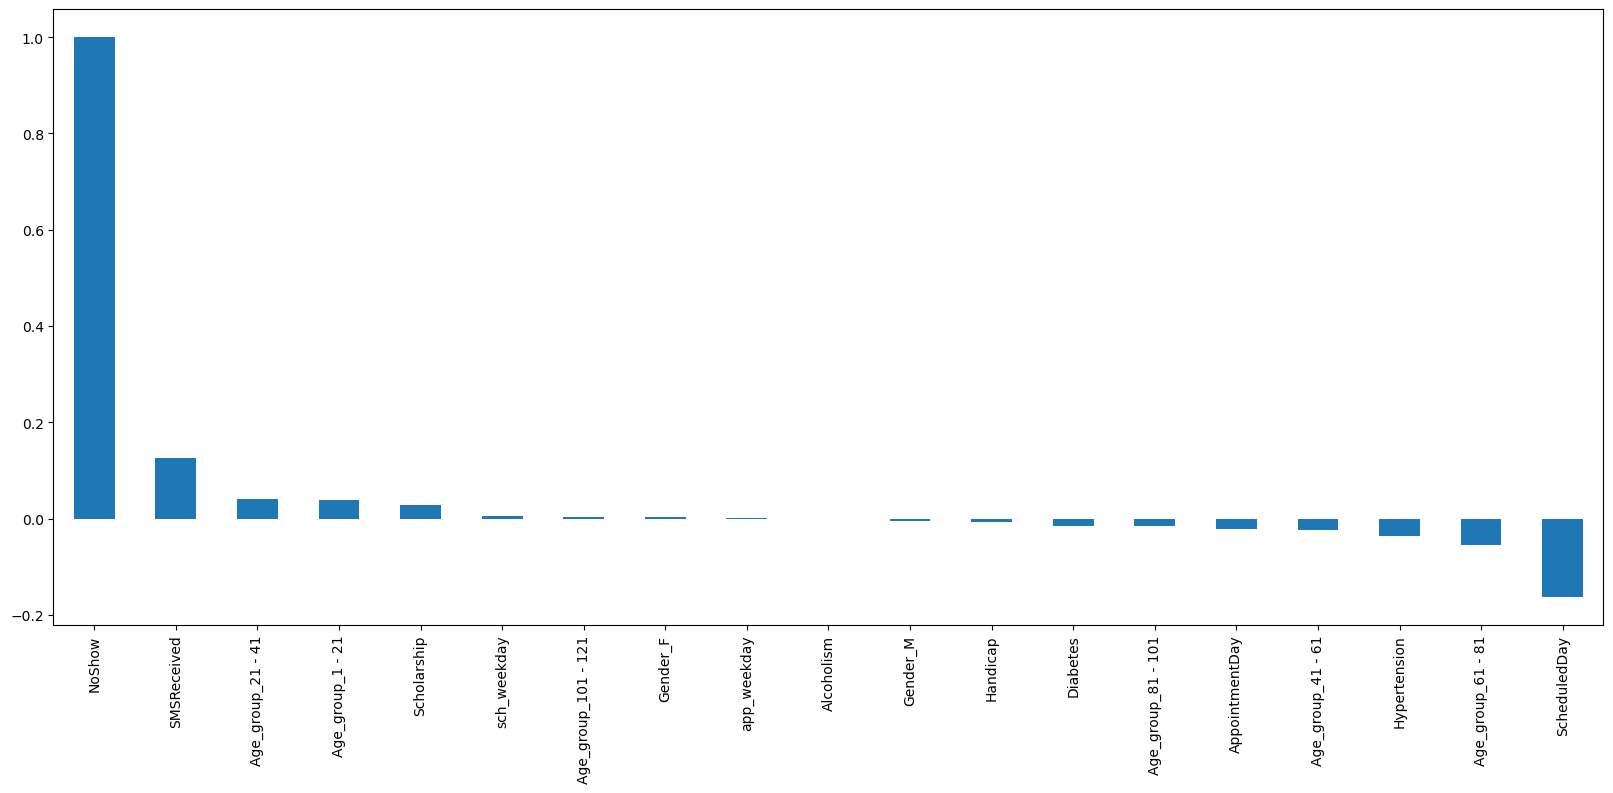

In [98]:
# Build a corelation of all predictors with 'NoShow'
plt.figure(figsize=(20,8))
base_data_dummies.corr()['NoShow'].sort_values(ascending = False).plot(kind='bar')
plt.show()

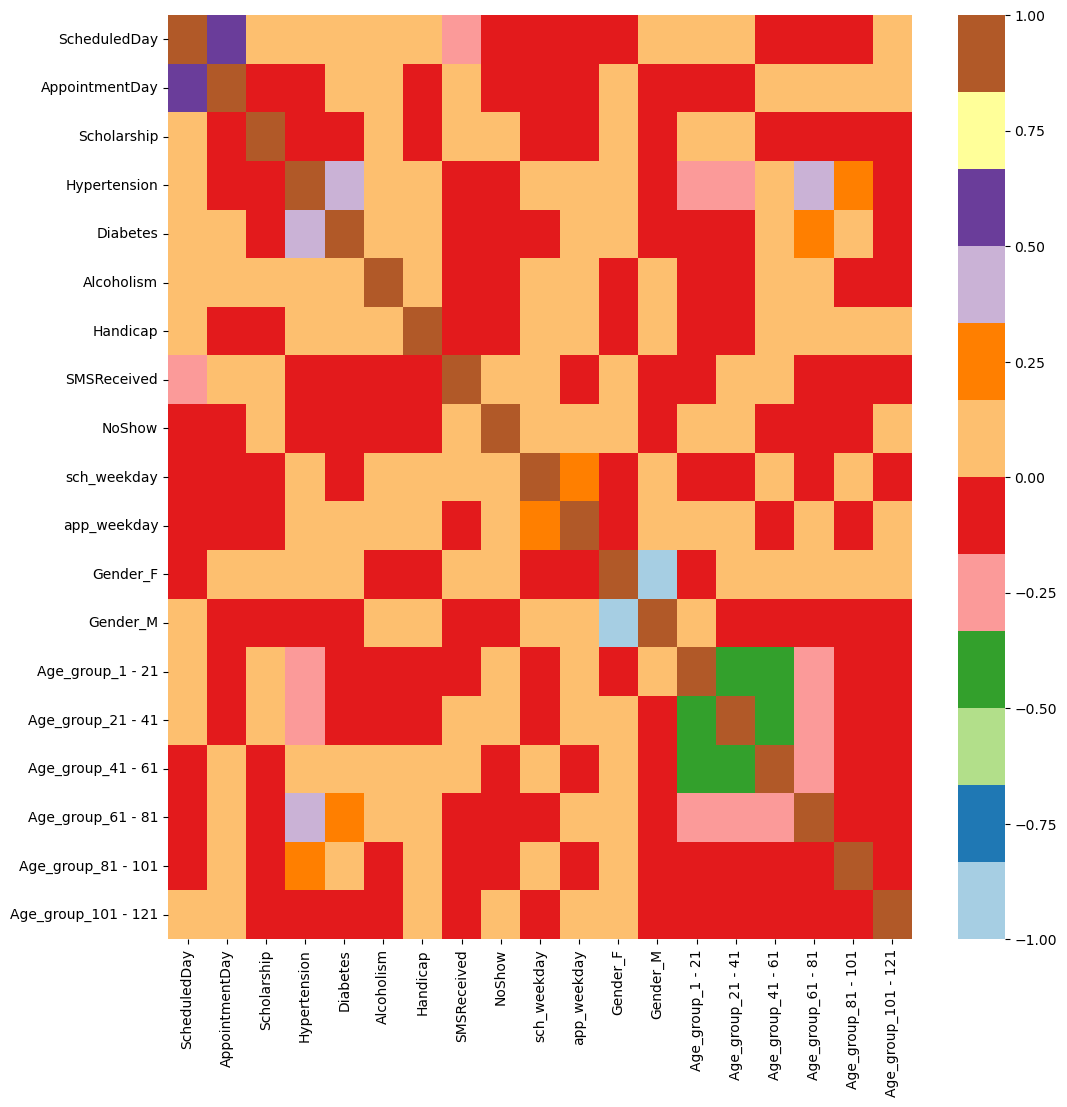

In [100]:
plt.figure(figsize=(12,12))
sns.heatmap(base_data_dummies.corr(), cmap="Paired")
plt.show()

# Bivariate Analysis

In [103]:
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [105]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

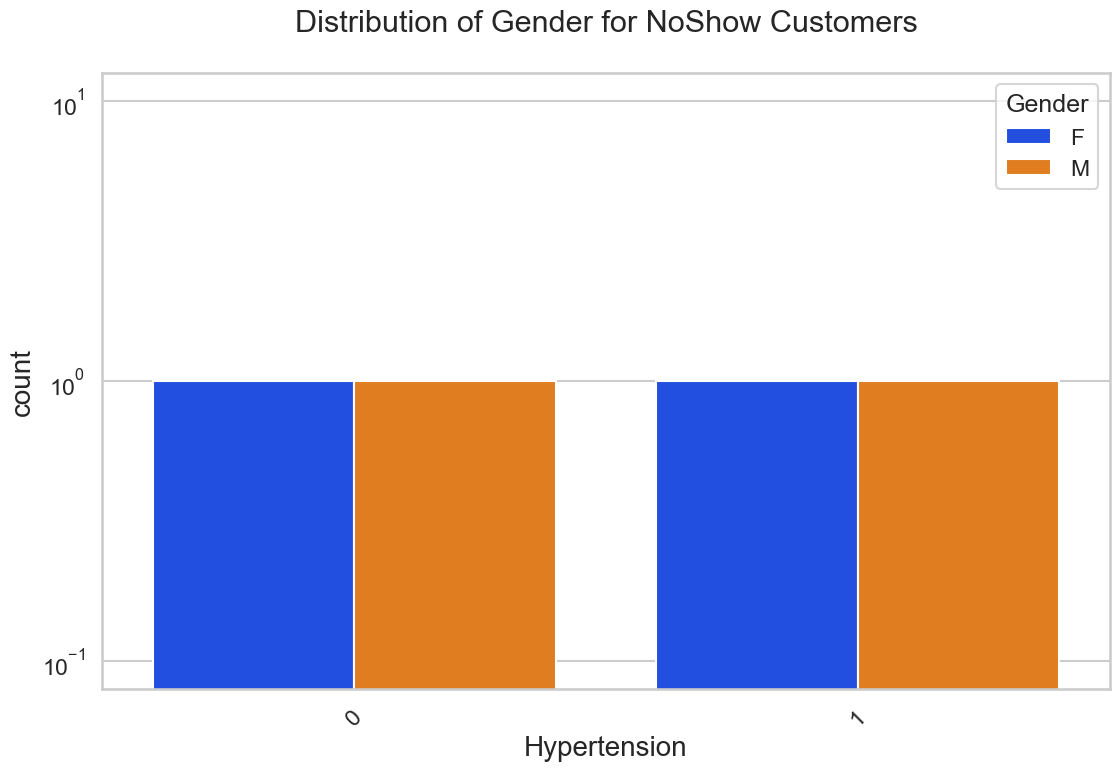

In [107]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

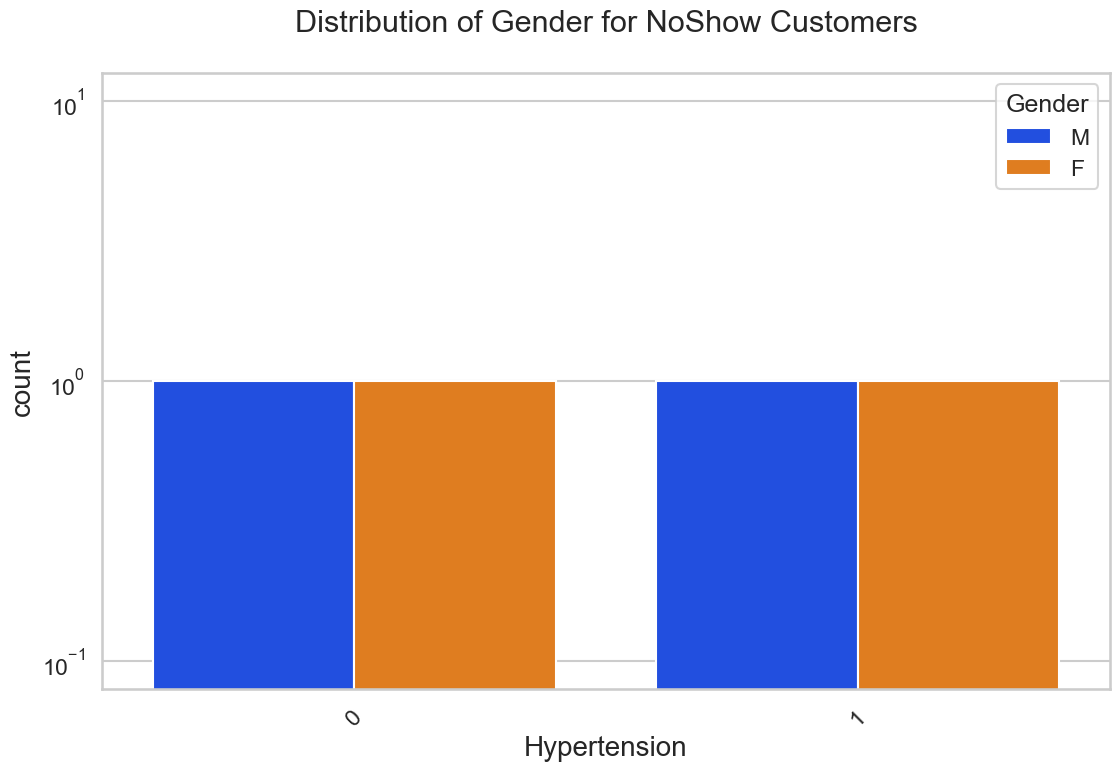

In [109]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

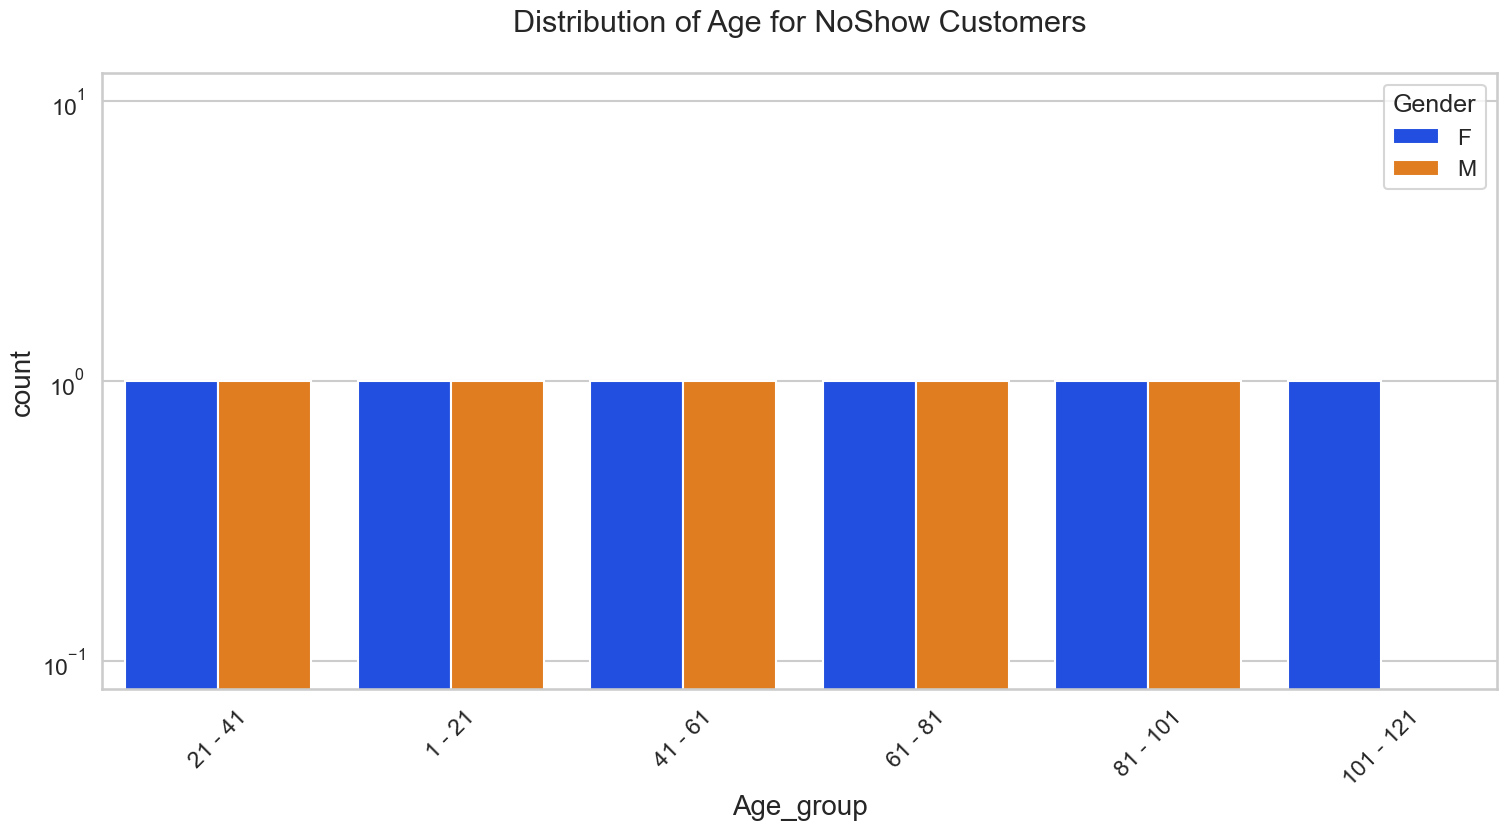

In [111]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

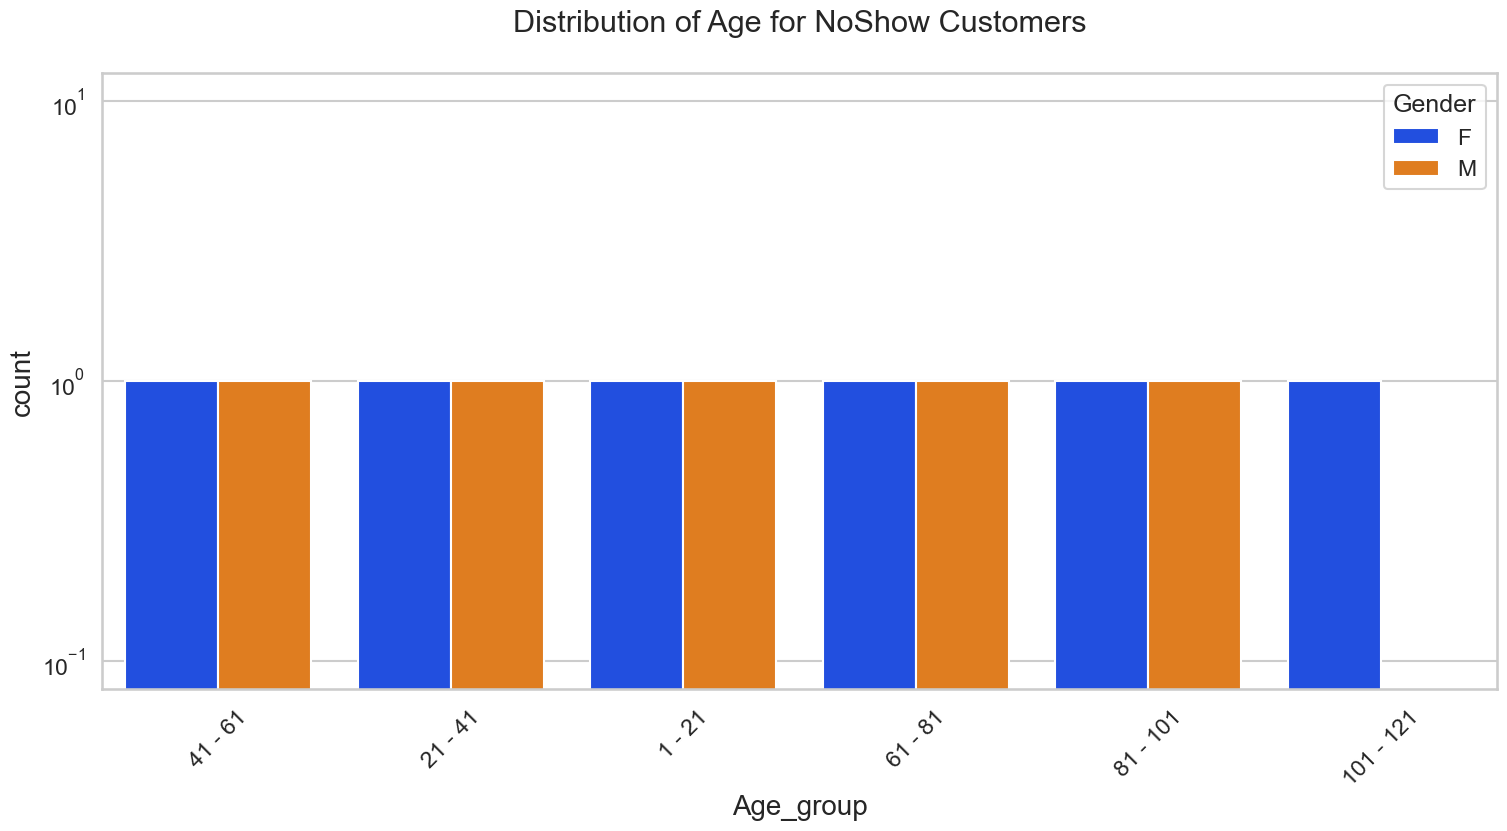

In [113]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

Findings
1.Female patients have taken more appointments then male patients
2.Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
3.Each Neighbourhood have almost 80% show rate
4.There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
5.there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
6.there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
7.there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
8.there is no appointments on sunday and on saturday appointments are very less in comparision to other week days